_Kalp krizi riski'ne ilişkin veri kümesini kullanarak:_
- _Değişik eps ve minsamples değerleri deneyerek DBSCAN metodunu uygulayın. İki kümeli çözüm üretmenin pek kolay olmadığını göreceksiniz._
- _eps = 1, minsamples = 1, metric =" euclidean " şeklinde parametreleri ayarlayarak DBSCAN uygulayın. Ardından, minsamples değerini artırın. Artışın kümelerinin sayısı üzerindeki etkisi nedir?_
- _eps = 1, minsamples = 1, metric =" euclidean " şeklinde parametreleri ayarlayarak DBSCAN uygulayın. Ardından, eps değerini artırın. Artışın kümelerinin sayısı üzerindeki etkisi nedir?_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_excel('heart.xlsx')
df['ca'] = df.ca.replace('<null>', 0)
df['thal'] = df.thal.replace('<null>', 3)
df['num'] = df.num.replace({'positive':1, "negative":0})
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
2,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [3]:
y = df.num
x = df.drop('num', axis=1)

scaler = StandardScaler()
x_std = scaler.fit_transform(x)

x_pca = PCA(n_components = 2).fit_transform(x_std)
df_pca = pd.DataFrame(x_pca)

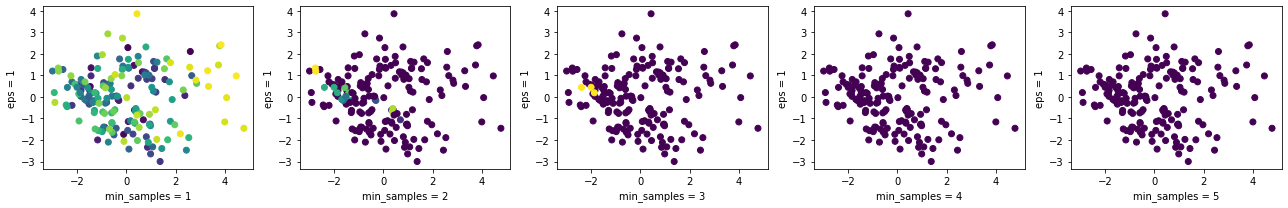

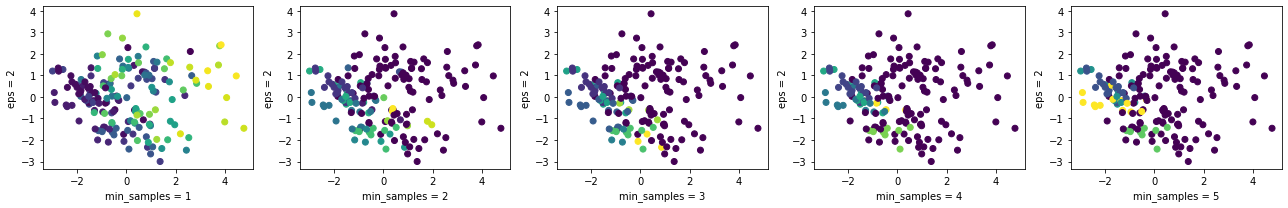

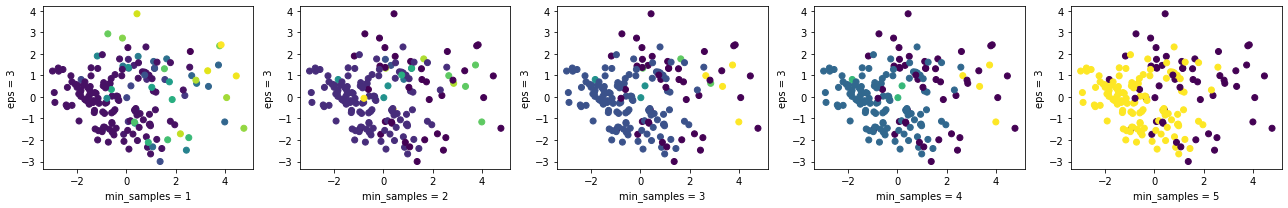

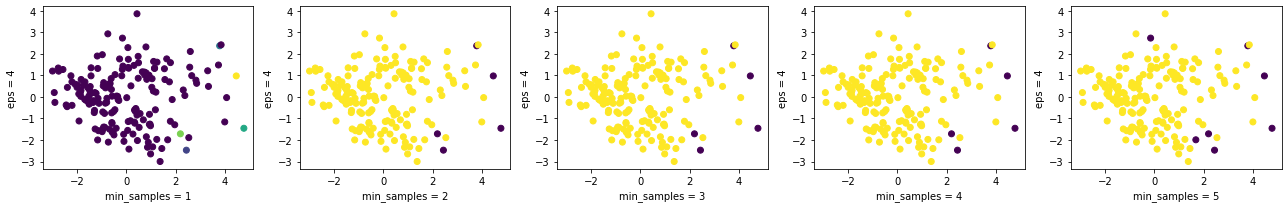

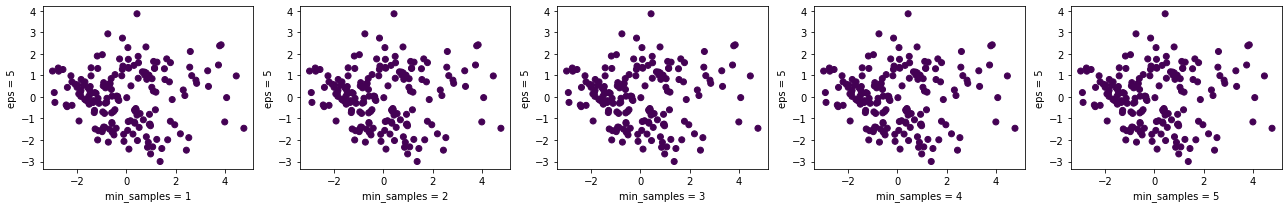

In [4]:
for e in range(1,6):
    plt.figure(figsize=(18,3))
    for num, p in enumerate(range(1,6), 1):
        y_label = DBSCAN(eps = e, min_samples = p).fit_predict(x_std)
        plt.subplot(1, 5, num)
        plt.scatter(x_pca[:,0], x_pca[:,1], c = y_label)
        plt.ylabel('eps = '+ str(e))
        plt.xlabel('min_samples = '+ str(p))
        plt.tight_layout()
    plt.show()

In [5]:
dflabel = pd.DataFrame()
for e in range(2,5):
    for p in range(1,6):
        y_label = DBSCAN(eps = e, min_samples = p).fit_predict(x_std)
        dflabel = dflabel.append(pd.DataFrame({'ari' : metrics.adjusted_rand_score(y, y_label),
                                               'silhouette': metrics.silhouette_score(x_std, y_label),
                                               'eps' : e,
                                               'min_samples' : p}, index = ['dcscan_'+str(e)+str(p)]))
dflabel

,ari,silhouette,eps,min_samples
dcscan_21,0.010399,0.072754,2,1
dcscan_22,-0.078049,-0.043159,2,2
dcscan_23,-0.084032,-0.042978,2,3
dcscan_24,-0.089619,-0.058617,2,4
dcscan_25,-0.090674,-0.052524,2,5
dcscan_31,0.190809,-0.015433,3,1
dcscan_32,0.166081,0.035676,3,2
dcscan_33,0.165410,0.033184,3,3
dcscan_34,0.165957,0.051403,3,4
dcscan_35,0.139770,0.173272,3,5


- l2_complete > 0.454083 - 0.286047 (hierarchy)

> - DCSCAN yöntemi, kmeans yöntemine göre daha düşük performans gösterdi.
> - Kullanılan eps ve min_samples parametreleri arasından en iyi skoru dcscan_43+ elde etti.
> - Grafiklerde ise epsilonun 4 olduğu aralıkta en iyi sonuçlar alındı. 